In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob 
import pandas as pd
import seaborn as sns

(4, 3, 4)
    width            cands           mu        std
0   ind=0      1. NeuraLCB    33.543330   1.843439
1   ind=1      1. NeuraLCB   124.968988   3.169119
2   ind=2      1. NeuraLCB   476.506479   7.809151
3   ind=3      1. NeuraLCB  3003.578659   8.332902
4   ind=0      2. NeuralTS    35.603394   2.567020
5   ind=1      2. NeuralTS   123.711264   3.376607
6   ind=2      2. NeuralTS   473.722461   6.165894
7   ind=3      2. NeuralTS  3002.639381  10.858014
8   ind=0  3. Neural-PELPS     0.013522   0.001967
9   ind=1  3. Neural-PELPS     0.010412   0.000867
10  ind=2  3. Neural-PELPS     0.011260   0.002472
11  ind=3  3. Neural-PELPS     0.010828   0.000735


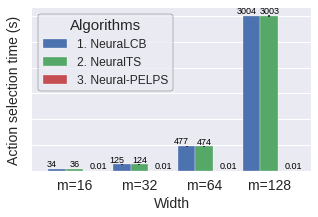

In [3]:
data = 'quadratic'
result_path = os.path.join('/results/width-effect-results/')
algos = [ 'NeuraLCB', 'NeuralTS', 'NeuraLMC'] 
algos_labels = [ '1. NeuraLCB', '2. NeuralTS', '3. Neural-PELPS']

hidden_sizes = [16, 32, 64, 128]

T = 5 # -1
n = 4
xtickers = ['m={}'.format(m) for m in hidden_sizes]

res_per_hidden = [] # (h, algo, trial)
# data_frs = []
agg_data = []
for j,hidden_size in enumerate(hidden_sizes): 
    res_per_algo = []
    agg_data_per_algo = []
    for k, algo in enumerate(algos): 
        data_path = os.path.join(result_path, 'width={}'.format(hidden_size),data, algo)
        data_per_trial = []
        for trial in range(n):
            tmp = np.load(os.path.join(data_path, 'trial={}.npz'.format(trial)))['arr_2'][:,1][T]
            data_per_trial.append(tmp)
        res_per_algo.append( data_per_trial)
 
        # data_frs.append([hidden_size, algos_labels[k], tmp[T]])
        agg_data_per_algo.append(np.mean(np.array(data_per_trial))) 

    res_per_hidden.append(res_per_algo) 
    agg_data.append(agg_data_per_algo)

res_per_hidden = np.array(res_per_hidden) # (h, algo,t)

print(res_per_hidden.shape)

mu = np.mean(res_per_hidden, axis=-1).T.ravel() # (h, a) 
std = np.std(res_per_hidden, axis=-1).T.ravel() / np.sqrt(res_per_hidden.shape[-1]) # (h,a)

n_groups = len(hidden_sizes)
n_cands = len(algos) 
group = ['ind={}'.format(m) for  i in range(n_cands) for m in range(len(hidden_sizes))]
cands = [a for a in algos_labels for i in range(n_groups)]
# print(group)
# print(cands)
# print(mu)
# print(std)

data = {'width': group,
        'cands': cands,
        'mu': mu,
        'std': std}
df = pd.DataFrame(data)

print(df)

vals = df.pivot(index='width', columns='cands', values='mu')
yerr = df.pivot(index='width', columns='cands', values='std')

plt.style.use('seaborn')
# fig = plt.figure(figsize=(6, 4))

# plot vals with yerr
ax = vals.plot(kind='bar', yerr=yerr, logy=False, figsize=(5, 3), rot=0, width=0.8,\
    sort_columns=True, fontsize=14)
_ = ax.legend(title='Algorithms', loc='upper left', edgecolor='black', fontsize=12, \
    title_fontsize=15,fancybox=True, frameon=True)

ax.set_xticklabels(xtickers)
ax.set_yticklabels([])

# ax.set_yticks(np.array([500 * i for i in range(10)]))
# ax.set_yticklabels(np.arange(0, 10, 1000))


for i in range(len(hidden_sizes)): 
    for j in range(len(algos)):
        if j < 2:
            ax.text( -0.35 + j*0.36 + i , int(agg_data[i][j]) + 50 , round(agg_data[i][j]), color='black', ha='center', fontsize=9)
        else:
            ax.text( -0.35 + j*0.36 + i , int(agg_data[i][j]) + 50 , round(agg_data[i][j], 2), color='black', ha='center', fontsize=9)
        

ax.set_ylabel('Action selection time (s)', fontsize=14)
ax.set_xlabel('Width', fontsize=14)

ax.grid(axis='x')



# plt.gca().invert_xaxis()

# _ = ax.legend(title='Sample Set', bbox_to_anchor=(1, 1.02), loc='upper left')



In [4]:
fname = os.path.join(result_path, 'action_select_time_neurips.png')
ax.figure.savefig(fname, bbox_inches='tight', dpi=400)